# Importing Libraries

In [1]:
import torch
#from torch import nn

#import numpy as np

from sklearn import datasets

import matplotlib as mpl
import matplotlib.pyplot as plt

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Creating Dataset

In [8]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of data clusters around selected central locations")

statements = [
    """
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)
"""
]
tabulation.statement_generator(statements)

variables = ["X", "y"]
values = [str(reprlib_rules.repr(X)), str(reprlib_rules.repr(y))]
tabulation.variable_generator(variables, values)

Creation of data clusters around selected central locations

    +----------------------------------------------+
    | Statement                                    |
    +----------------------------------------------+
    | n_pts = 100                                  |
    | centers = [[-0.5, 0.5], [0.5, -0.5]]         |
    | X, y = datasets.make_blobs(n_samples=n_pts,  |
    |                            random_state=123, |
    |                            centers=centers,  |
    |                            cluster_std=0.4)  |
    +----------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | X        | array([[-0.13715792, -0.07147228],               |
    |          |        [ 0.80437976, -0.37061246],               |
    |          |        [-0.60224775, -0.61943564],               |
 

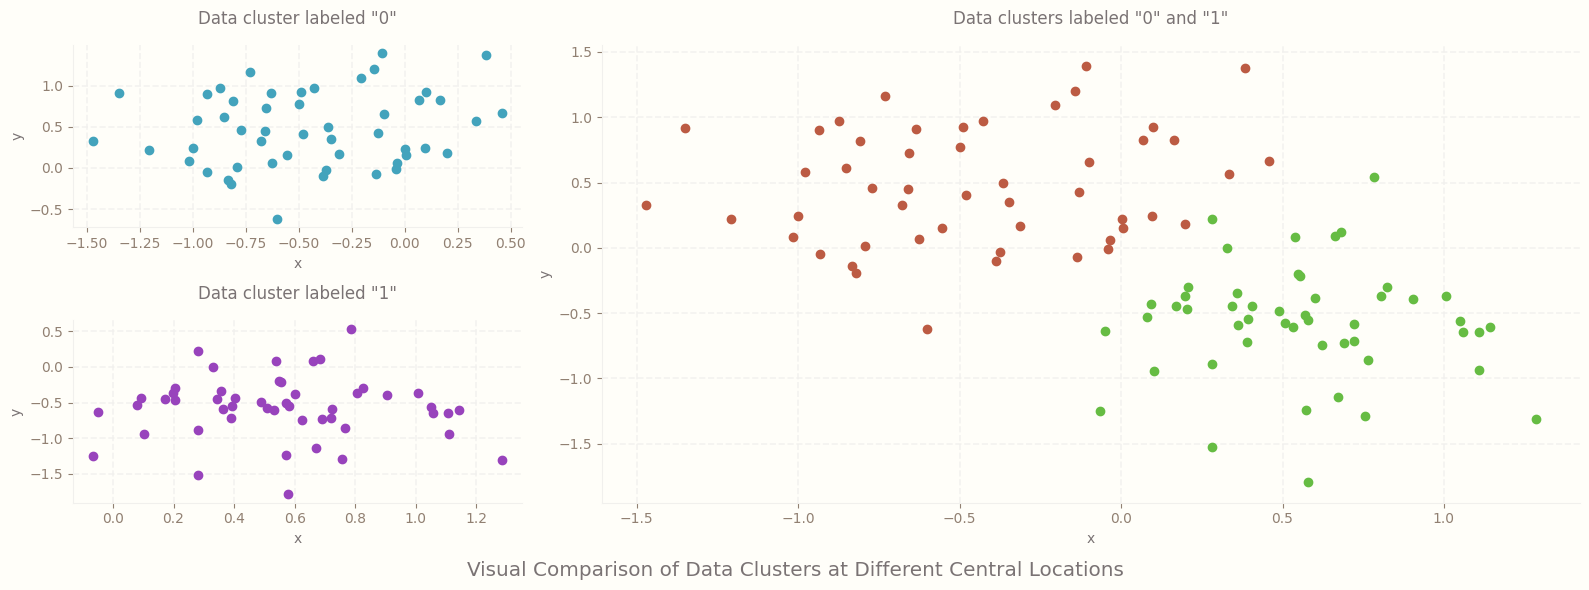

In [9]:
colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 3 * 2)

fig, axs = plt.subplots(nrows=2, ncols=3)
gs = axs[0, 1].get_gridspec()
for ax in axs[0, 1:]:
    ax.remove()
for ax in axs[1, 1:]:
    ax.remove()
axbig = fig.add_subplot(gs[:, 1:])

axs[0, 0].scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axs[0, 0].set_title("Data cluster labeled \"0\"", loc="center", pad=15)

axs[1, 0].scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axs[1, 0].set_title("Data cluster labeled \"1\"", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="x", ylabel="y")

axbig.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axbig.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axbig.set_title("Data clusters labeled \"0\" and \"1\"", loc="center", pad=15)

axbig.set(xlabel="x", ylabel="y")

fig.suptitle(
    "Visual Comparison of Data Clusters at Different Central Locations",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

In [10]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)

tabulation = Form_Generator()
tabulation.heading_printer("Dataset conversion in tensor form")

statements = ["""
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)
"""]
tabulation.statement_generator(statements)

variables = ["X_data", "y_data"]
values = [str(reprlib_rules.repr(X_data)), str(reprlib_rules.repr(y_data))]
tabulation.variable_generator(variables, values)

Dataset conversion in tensor form

    +--------------------------+
    | Statement                |
    +--------------------------+
    | X_data = torch.Tensor(X) |
    | y_data = torch.Tensor(y) |
    +--------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | X_data   | tensor([[-0.1372, -0.0715],                      |
    |          |         [ 0.8044, -0.3706],                      |
    |          |         [-0.6022, -0.6194],                      |
    |          |         [ 0.5709, -0.5120],                      |
    |          |         [ 0...,  0.2444],                        |
    |          |         [-0.0484, -0.6330],                      |
    |          |         [-0.8518,  0.6135],                      |
    |          |         [ 0.3581, -0.3434],                      |
    |          |   

# Model Setup

In [11]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

NameError: name 'nn' is not defined

In [ ]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

In [ ]:
[w, b] = model.parameters()
print([w, b])

In [ ]:
w1, w2 = w.view(2)
b1 = b[0]
print(w1, w2, b1)

In [ ]:
print(w1.item(), w2.item(), b1.item())

In [ ]:
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [ ]:
def scatter_plot():
    colors = bright_colors(2)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[0])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[1])

In [ ]:
scatter_plot()

In [ ]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    # 0 = w1 * x1 + w2 * x2 + b1
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, "r")
    scatter_plot()

In [ ]:
plot_fit("Initial Model")

# Model Training

In [ ]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(-1, 1)
print(X_data[::10])
print(y_data[::10])

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
losses = []
termcolors = [
    "grey", "red", "green", "yellow", "blue", "magenta", "cyan", "white"
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    if i == 1 or i % 100 == 0:
        print(colored("epoch:", font_colors[0], attrs=["bold"]), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
colors = bright_colors(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
plot_fit("Trained Model")

# Model Testing

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print("Red point positive probability = {}".format(
    model.forward(point1).item()))
print("Black point positive probability = {}".format(
    model.forward(point2).item()))
plot_fit("Trained Model")

In [ ]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [ ]:
torch.manual_seed(2)
model = Model(2, 1)
[w, b] = model.parameters()
w1, w2 = w.view(2)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print("Red point positive probability = {}".format(
    model.forward(point1).item()))
print("Black point positive probability = {}".format(
    model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit("Trained Model")